<center><span style="font-size:40px;"><b>REINFORCEMENT LEARNING</b></span></center>

In [1]:
from IPython.display import Image, display

---

# 00 - INTRODUCTION

In traditional **Machine Learning**, solutions typically rely on a *supervisor* that provides labeled and meaningful data describing the phenomenon of interest. However, this approach is not always feasible. In many real-world situations, data cannot be pre-collected or labeled easily.  

**Reinforcement Learning (RL)** addresses this challenge by focusing on scenarios where data must be gathered *through interaction*. The agent explores and interacts with its environment—often without explicit instructions or prior knowledge—and learns how to make decisions that maximize a certain objective, typically expressed as a cumulative reward.  
Examples of RL: self-driving cars, algorithms to play chess...


### LIMITS OF SUPERVISED LEARNING

Supervised learning, though powerful, faces several limitations when applied to dynamic or interactive environments:

- Data may only become available through interaction with the world.
- Collected information is often indirect, providing only partial feedback on performance in the form of rewards rather than explicit labels.
- Time dependency matters: data points are not necessarily independent and identically distributed (i.i.d.), meaning that the order of events affects learning.
- Many supervised learning approaches fail to consider long-term consequences of actions, focusing instead on immediate outcomes.


### RL ELEMENTS

Reinforcement Learning formalizes the learning process through a set of well-defined elements:

- **Agent**: the decision-maker attempting to solve a task.
- **States**: all possible situations or configurations in which the agent may find itself.
- **Actions**: the set of possible moves or decisions the agent can take (which may depend on the current state).
- **Environment**: the external system the agent interacts with. It provides **rewards** in response to the agent’s actions and determines state transitions.
- **Rewards**: feedback signals that indicate how good or bad an action was, guiding the agent toward its goal.
- The agent may prioritize **long-term rewards** (maximizing future gains) rather than short-term ones.



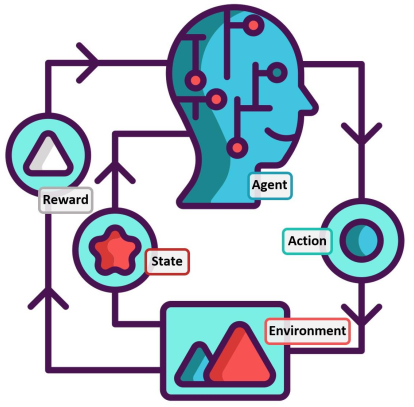

In [3]:
display(Image("./images/RL_elements.png", width=300))

### RL FEATURES

In Reinforcement Learning (RL), the **model of the environment is not known in advance**.  
Instead, the agent must **learn about the environment by interacting** with it and observing the outcomes of its actions.

The agent’s objective is not to perform optimally at every single step, but rather to **maximize long-term rewards** over time.  
This introduces the concept of **planning**, which is central to RL: decisions at each stage must account for their future impact.

For example, in chess, the *true* reward is obtained only at the end of the game (winning or losing). During play, even actions that seem negative—like sacrificing a piece—can be *optimal* if they lead to a better position and ultimately to victory.


Reinforcement Learning can be understood as both:
- a research area, which is a subfield of Machine Learning, and  
- a learning paradigm, focused on teaching an agent how to control a system with many unknown elements in order to maximize a numerical performance measure (the reward).

Unlike other paradigms, RL does not rely on pre-collected historical data. Instead, it **focuses on learning through direct interaction with the environment** rather than from fixed datasets and it focuses on achieving **long-term objectives**, not just immediate rewards.  

Examples of reinforcement Learning: Chatbots and dialogue systems; Autonomous agents (self-driving cars, drones, robots); Games (chess, Go, video games); HVAC systems for energy optimization; Trading and portfolio management; Online advertising and recommender systems; Healthcare and biological systems.

---

## 0.1 - MORE ON THE ELEMENTS

### REWARDS

A **reward** $R_t$ is a scalar feedback signal that measures how well the agent is performing at a given time step $t$.  
Here, a *time step* represents a discrete point in the interaction sequence between the agent and the environment. While continuous-time RL formulations exist, they are beyond the scope of this notebook. The **agent’s objective** is to maximize the **cumulative reward**, which is the sum—or sometimes a discounted sum—of all rewards collected over time. Actions may have long-term consequences, and rewards can be delayed rather than immediate. To achieve long-term success, the agent may need to sacrifice short-term rewards in favor of larger future gains. This is a trade-off.

We distinguish between two main types of tasks:

1. **Episodic tasks** – These have a clear beginning and end (e.g., games). Here the agent aims to maximize the total reward accumulated within an episode.
2. **Continuous tasks** – These go on indefinitely (e.g., controlling a data center or an industrial process). Here the agent focuses on maximizing rewards over a defined or rolling time horizon.

Reinforcement Learning is founded on the **reward hypothesis**, which states:

> *All goals can be represented as the maximization of the expected cumulative reward.*

### LINK BETWEEN AGENT, ACTIONS AND ENVIRONMENT

At each discrete time step $t$, the **agent** (the entity we control or program):

- Is in a **state** $S_t$, representing a complete description of the system (agent + environment) at time $t$;  
- Executes an **action** $A_t$, which must be feasible given $S_t$.

The **environment**, in response to the pair $(S_t, A_t)$:

- Provides a **reward** $R_{t+1}$;  
- Transitions the agent to a **new state** $S_{t+1}$.

This continuous interaction between agent and environment defines the feedback loop at the core of RL.

Technically, at each step, the agent receives an observation $O_{t+1}$ that represents partial or full information about the new state.

- In fully observable environments (like a chess board), we have $S_{t+1} = O_{t+1}$.  
- In partially observable environments (like dutring a poker game), the true state is not directly available and must be inferred from the history $H_t$, and the state can be represented as a function of this history:

$$H_t = (O_1, R_1, A_1, \dots, A_{t-1}, O_t, R_t), \quad \quad S_t = f(H_t)$$

When the state can be estimated reliably, the learning process becomes simpler.  
Otherwise, alternative strategies are required, such as:
- treating the entire history as the state, or  
- using supervised learning models to approximate the hidden state.

### COMPONENTS OF AN AGENT

A RL agent can be described through several components:

- **Policy ($\pi$):** defines the agent’s behavior, mapping states to actions. This is the fundamental and really needed element.
- **Value function ($V$):** estimates how *good* it is to be in a particular state.  
- **Action-value function ($Q$):** estimates how *good* a given state–action pair is.  
- **Model:** represents the agent’s internal understanding of the environment’s dynamics.

### POLICY

The policy is the core of a RL agent, defining how it selects actions based on the current state.  
**The ultimate goal of RL is to discover the optimal policy $\pi$ — the one that maximizes expected cumulative rewards**.

Policies can take two main forms:

- Deterministic policy:  
  $$a = \pi(s), \quad  \quad \quad \textit{with a=action and s=state}$$  
- Stochastic policy: defines a probability distribution over possible actions for each state.
  $$\pi(a|s) = \mathbb{P}[A_t = a \,|\, S_t = s]$$  

---

---

---

---

# 01 - MULTI-ARMED BANDITS